In [1]:
import configparser
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN, OPTICS, SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

config = configparser.ConfigParser()
config.read("../config.ini")

from data.data_util import cluster_data, sample_data, plot_difference_gender_age, categorize_age, plot_cluster_analysis
import pandas as pd

In [2]:
dataset = 'nih'
id = "57b9204b-74a3-4e30-a83c-eb1aa62c9f09"

In [3]:
X = np.load('/Users/dilermando/dev/Fairness/data/dataset/experiment/57b9204b-74a3-4e30-a83c-eb1aa62c9f09/tsne_nih_57b9204b-74a3-4e30-a83c-eb1aa62c9f09.npy')
X.shape

(24982, 2)

eps=3 and min_samples=50
eps=3 and min_samples=40

In [4]:
db = DBSCAN(eps=3, min_samples=40).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of clusters: 22
Estimated number of noise points: 2879


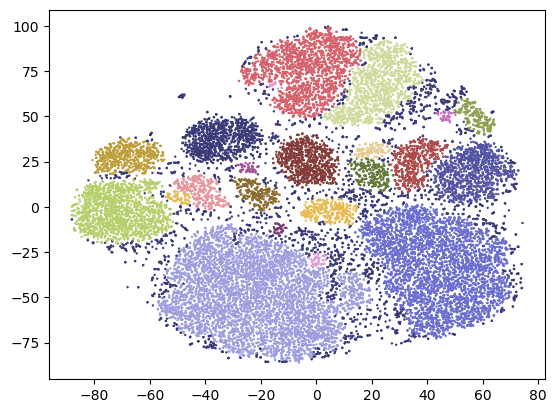

In [5]:
# colors = np.array(['#1f77b4' if l != -1 else 'red' for l in labels])

plt.scatter(X[:, 0], X[:, 1], c=labels, s=0.5, cmap='tab20b')
plt.show()

In [6]:
data = pd.read_csv(f"{config[dataset]['labels']}")
sex_map = {'F': 'Female', 'M': 'Male'}
data['Patient Gender'] = data['Patient Gender'].map(sex_map)

data = categorize_age(data)
data = cluster_data(data, id, dataset_name=dataset, pca=False, tsne=True, cluster_type='spectral', labels_tsne=labels)
_, sampled_tsne = sample_data(data, 0.3, n_clusters_, type='cluster')
sampled_random = data.sample(n=len(sampled_tsne))

In [7]:
len(sampled_tsne), len(sampled_random)

(5797, 5797)

# Sample data

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarni

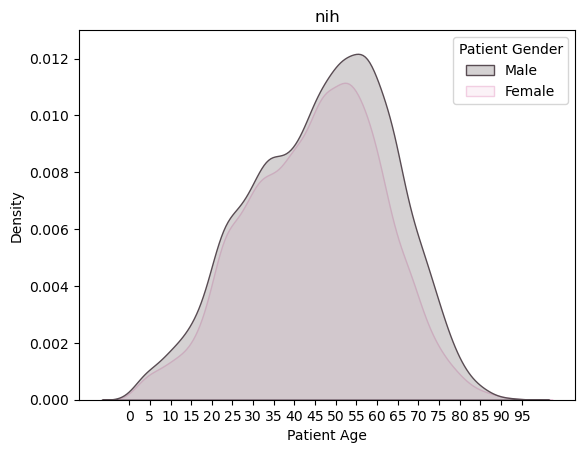

In [8]:
plot_difference_gender_age(
    data,
    dir=f"../data/dataset/experiment/{id}/gender_age_tsne.jpg",
    title=f"{dataset}",
    save=False,
    palette=['#594C53', '#F2CEE2'],
    column_age='Patient Age'
    )

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarni

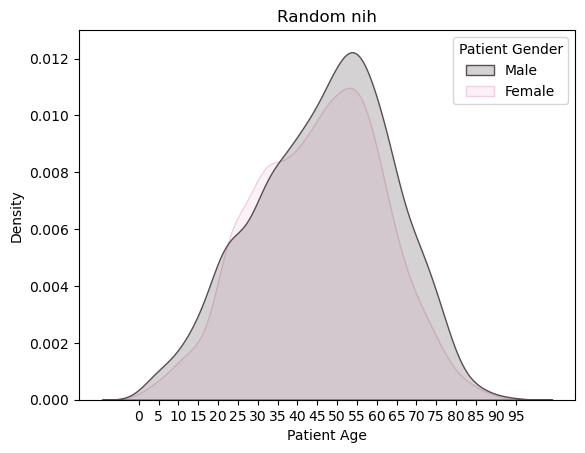

In [9]:
plot_difference_gender_age(
    sampled_random,
    dir=f"../data/dataset/experiment/{id}/gender_age_tsne.jpg",
    title=f"Random {dataset}",
    save=False,
    palette=['#594C53', '#F2CEE2']
    )

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarni

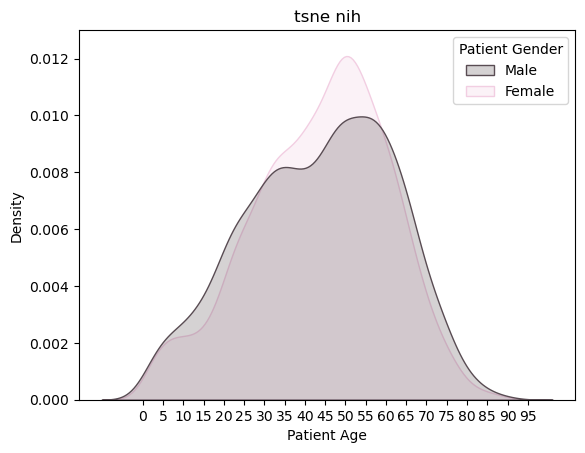

In [10]:
plot_difference_gender_age(
    sampled_tsne,
    dir=f"../data/dataset/experiment/{id}/gender_age_tsne.jpg",
    title=f"tsne {dataset}",
    save=False,
    palette=['#594C53', '#F2CEE2'])

In [20]:
data['Patient Gender'].value_counts(normalize=True) * 100

Patient Gender
Male      53.894804
Female    46.105196
Name: proportion, dtype: float64

In [11]:
sampled_tsne['Patient Gender'].value_counts(normalize=True) * 100

Patient Gender
Female    50.112127
Male      49.887873
Name: proportion, dtype: float64

In [12]:
sampled_random['Patient Gender'].value_counts(normalize=True) * 100

Patient Gender
Male      53.199931
Female    46.800069
Name: proportion, dtype: float64

In [13]:
sampled_random.groupby('Patient Age Categorized').size()

Patient Age Categorized
0-15      195
15-30     860
30-45    1519
45-60    1964
60-75    1062
75-90     194
90+         3
dtype: int64

In [14]:
sampled_tsne.groupby('Patient Age Categorized').size()

Patient Age Categorized
0-15      366
15-30     918
30-45    1503
45-60    1864
60-75    1014
75-90     131
90+         1
dtype: int64

# Cluster info

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


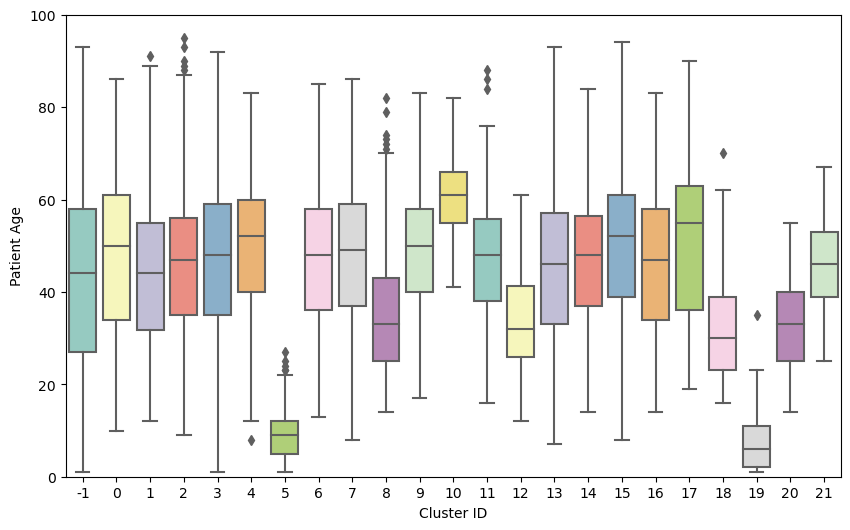

In [15]:
plot_cluster_analysis(data, column_age="Patient Age")

<Axes: xlabel='cluster_id_tsne'>

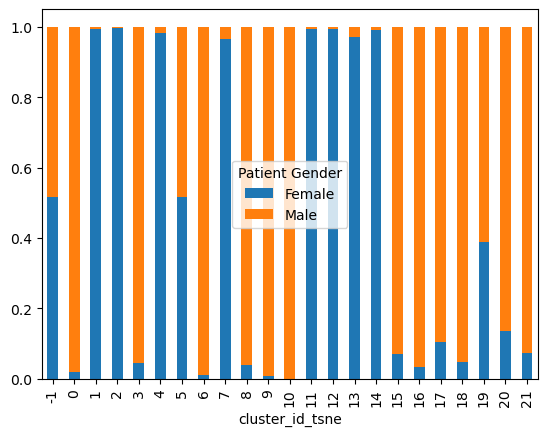

In [16]:
grouped = data.groupby(['cluster_id_tsne', 'Patient Gender']).size().unstack().fillna(0)
grouped_percentage = grouped.divide(grouped.sum(axis=1), axis=0)

# Criando um gráfico de barras empilhado
grouped_percentage.plot(kind='bar', stacked=True)

In [19]:
grouped_percentage

Patient Gender,Female,Male
cluster_id_tsne,,
-1,0.516846,0.483154
0,0.020202,0.979798
1,0.992834,0.007166
2,0.996312,0.003688
3,0.044855,0.955145
4,0.983766,0.016234
5,0.516245,0.483755
6,0.010938,0.989062
7,0.966465,0.033535


<Axes: xlabel='cluster_id_tsne'>

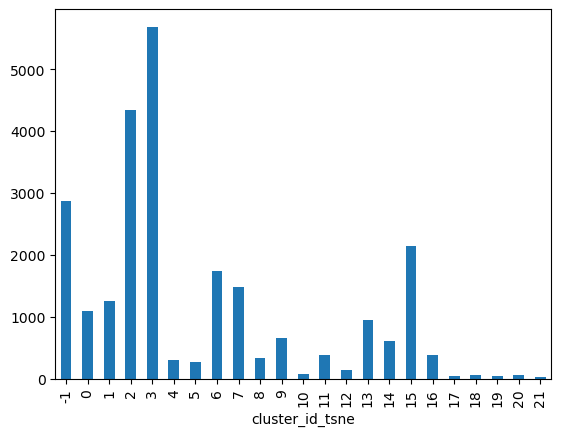

In [17]:
data.groupby('cluster_id_tsne').size().plot(kind='bar')

In [18]:
#order
data.groupby('cluster_id_tsne').size().sort_values(ascending=False)

cluster_id_tsne
 3     5685
 2     4338
-1     2879
 15    2145
 6     1737
 7     1491
 1     1256
 0     1089
 13     957
 9      652
 14     615
 11     382
 16     379
 8      329
 4      308
 5      277
 12     140
 10      77
 18      63
 20      59
 19      49
 17      48
 21      27
dtype: int64